In [11]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [13]:
data1 = pd.read_csv('bjp_tweets.csv')
data2 = pd.read_csv('congress_tweets.csv')
data = pd.concat([data1,data2])
# Preprocess the text by converting it to lowercase and removing unnecessary characters
data['text'] = data['tweet'].str.lower()
data['text'] = data['tweet'].str.replace('[^\w\s]', '')
count_target = data['target']
data.drop('tweet', inplace=True, axis=1)
data.head()

,Unnamed: 0,target,text
0,0,0,ndtv anchor let go over to aap live press conf...
1,1,0,sambit patra attacks rahul gandhi over his cow...
2,2,1,crediting the bjp with taking development to s...
3,3,0,ktrbrs do do false allegations on iasassociati...
4,4,1,gujarat assembly yet to get rs cr as gst compe...


Text(0, 0.5, 'Labels count')

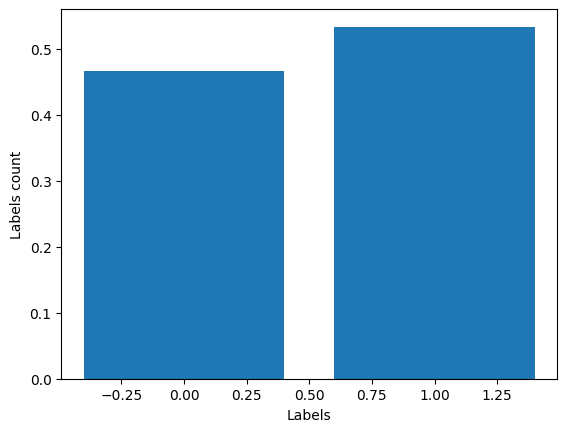

In [14]:
df = pd.DataFrame(data)
sentiments = df["target"].unique()
sentiment_nums = [len(df[df["target"] == sentiment]) / len(df) for sentiment in sentiments]
plt.bar(sentiments, sentiment_nums)
plt.xlabel("Labels")
plt.ylabel("Labels count")

In [15]:
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

In [16]:
max_features = 10000  # Maximum number of words to keep based on word frequency
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(train_data['text'])
train_sequences = tokenizer.texts_to_sequences(train_data['text'])
test_sequences = tokenizer.texts_to_sequences(test_data['text'])

In [17]:
max_len = 100  # Maximum length of a sequence
X_train = pad_sequences(train_sequences, maxlen=max_len)
X_test = pad_sequences(test_sequences, maxlen=max_len)

In [18]:
y_train = train_data['target'].values
y_test = test_data['target'].values

In [19]:
embedding_dim = 100  # Dimension of the word embeddings
model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length=max_len))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
batch_size = 32
epochs = 100
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/100
1994/1994 [==============================] - 193s 96ms/step - loss: 0.4214 - accuracy: 0.8002 - val_loss: 0.4912 - val_accuracy: 0.7628
Epoch 2/100
1994/1994 [==============================] - 198s 99ms/step - loss: 0.2840 - accuracy: 0.8745 - val_loss: 0.4857 - val_accuracy: 0.7740
Epoch 3/100
1994/1994 [==============================] - 201s 101ms/step - loss: 0.2199 - accuracy: 0.9049 - val_loss: 0.4744 - val_accuracy: 0.7862
Epoch 4/100
1994/1994 [==============================] - 237s 119ms/step - loss: 0.1691 - accuracy: 0.9284 - val_loss: 0.5075 - val_accuracy: 0.7886
Epoch 5/100
1994/1994 [==============================] - 193s 97ms/step - loss: 0.1275 - accuracy: 0.9482 - val_loss: 0.6114 - val_accuracy: 0.7707
Epoch 6/100
1994/1994 [==============================] - 245s 123ms/step - loss: 0.0921 - accuracy: 0.9638 - val_loss: 0.6608 - val_accuracy: 0.7907
Epoch 7/100
1994/1994 [==============================] - 238s 120ms/step - loss: 0.0664 - accuracy: 0.9751 - 

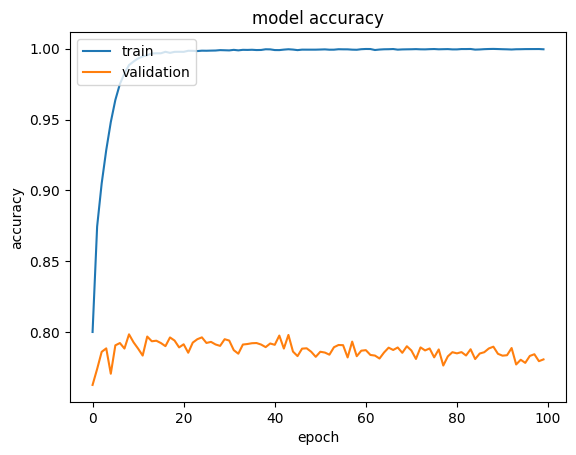

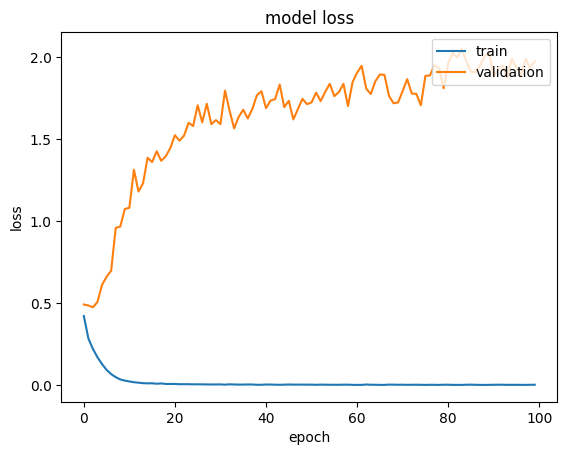

In [21]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [22]:
#Saving the model
from tensorflow.keras.models import load_model
model.save('model\p7.keras')

In [23]:
#Loading the model
from tensorflow.keras.models import load_model
model = load_model('model\p7.keras')

In [24]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

499/499 [==============================] - 10s 19ms/step - loss: 1.9768 - accuracy: 0.7808
Test Loss: 1.9767929315567017
Test Accuracy: 0.78082275390625


In [30]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/77/85/bff3a1e818ec6aa3dd466ff4f4b0a727db9fdb41f2e849747ad902ddbe95/scikit_learn-1.3.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/04/b8/947f40706ee2e316fd1a191688f690c4c2b351c2d043fe9deb9b7940e36e/scipy-1.11.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/59.1 kB ? eta -:--:--
     ------------------- ------------------ 30.7/59.1 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 59.1/59.1 kB 627.0 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/28/08/9dcdaa5aac4634e4c23af26d92121f7ce445c630efa0d3037881ae2407fb/joblib-1.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

499/499 [==============================] - 8s 16ms/step
Accuracy: 0.7808227768719428
Precision: 0.720030349013657
Recall: 0.7419859265050821
F1 Score: 0.7308432807085098


In [25]:
example_statement = "The government's handling of the economic crisis has been a complete failure, with skyrocketing inflation and rising unemployment rates, leaving the common people to suffer while politicians enjoy their privileges"
preprocessed_statement = example_statement.lower().replace('[^\w\s]', '')
sequence = tokenizer.texts_to_sequences([preprocessed_statement])
padded_sequence = pad_sequences(sequence, maxlen=max_len)
prediction = model.predict(padded_sequence)
sentiment = 'Positive' if prediction > 0.5 else 'Negative'
print("Predicted Sentiment:", sentiment)

1/1 [==============================] - 0s 477ms/step
Predicted Sentiment: Negative
